# DnD Monster Data Wrangling


## Importation

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

monster_df = pd.read_csv('../data/raw/Monster_Data_RAW.csv')

monster_df.head()

,Unnamed: 0,Monster Name,Size,Type,Alignment,Traits,Damage Resistances,Monster Tags:,Mythic Actions,Reactions,...,Proficiency Bonus,STR,DEX,CON,INT,WIS,CHA,Actions,Legendary Actions,Environment:
0,0,Adult Green Dragon,Huge,['dragon'],lawful evil,['Amphibious. The dragon can breathe air and w...,NaN,NaN,NaN,NaN,...,5,23,12,21,18,15,17,['Multiattack. The dragon can use its Frightfu...,"[""The dragon can take 3 legendary actions, cho...",['Forest']
1,1,Adult Silver Dragon,Huge,['dragon'],lawful good,['Legendary Resistance (3/Day). If the dragon ...,NaN,NaN,NaN,NaN,...,5,27,10,25,16,13,21,['Multiattack. The dragon can use its Frightfu...,"[""The dragon can take 3 legendary actions, cho...","['Mountain', 'Urban']"
2,2,Adult White Dragon,Huge,['dragon'],chaotic evil,"[""Ice Walk. The dragon can move across and cli...",NaN,NaN,NaN,NaN,...,5,22,10,22,8,12,12,['Multiattack. The dragon can use its Frightfu...,"[""The dragon can take 3 legendary actions, cho...",['Arctic']
3,3,Air Elemental,Large,['elemental'],neutral,"[""Air Form. The elemental can enter a hostile ...","Lightning, Thunder; Bludgeoning, Piercing, and...",NaN,NaN,NaN,...,3,14,20,14,6,10,6,['Multiattack. The elemental makes two slam at...,NaN,"['Desert', 'Mountain']"
4,4,Ape,Medium,['beast'],unaligned,[nan],NaN,['Misc Creature'],NaN,NaN,...,2,16,14,14,6,12,7,['Multiattack. The ape makes two fist attacks....,NaN,['Forest']


## Background Info on Challenge Rating: 
While the Monster Manual has hundreds of monsters ready to go, some times it isn't enough and you, as the dungeon master need to create your own monsters. However, using the guide provided by 5e wizards, somehow never lines up for myself or other DMs the way a the challenge rating for a monster manual does. 

In the Dungeon Master's guide, a challenge rating (CR) is made up primarly from the Armor Class, hit points, attack bonus, damage output per round, and the save DC. It ends up being an average of these items, when related to a chart. 

Additionally, Resistances and Immunities come into play, adding multipliers to the hit points

As far as average damage per round, the dungeon master's guide and wizards themselves indicates that a combat should last roughly 3 rounds. The DMG suggests averaging 3 rounds of combat to calculate the average damage per round. We will fiddle with that a bit though :D

In terms of party composition (this will matter for some AOE, range or aura based attacked), we will assume a standard party of four: 2 close combat and 2 ranged, Fighter, Rogue, Wizard, and Cleric.

Monster Features also impact the challege rating of a monster either through the armor class, hitpoints, attack bonus, or damage output for purposes of determining the CR.

Spell casting is important if a spell causes the monster to deal more damage than a normal attack routine or if it increases the monster AC or hitpoints.

If a monster can fly and deal damage at range it's armor class goes up by 2 if its below 10

Saving throw bonests 3-4 increase AC by 2. 5 or more increase AC by 4.

## Monster Manual Monsters

Using this, let's take a look at a few example Monsters and see how close the CRs compare

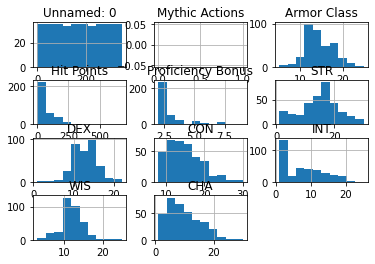

In [20]:
monster_df.hist();


In [19]:
two_monsters_df = monster_df.iloc[0:2,]

two_monsters_df = two_monsters_df[]

,Unnamed: 0,Monster Name,Size,Type,Alignment,Traits,Damage Resistances,Monster Tags:,Mythic Actions,Reactions,...,Proficiency Bonus,STR,DEX,CON,INT,WIS,CHA,Actions,Legendary Actions,Environment:
0,0,Adult Green Dragon,Huge,['dragon'],lawful evil,['Amphibious. The dragon can breathe air and w...,NaN,NaN,NaN,NaN,...,5,23,12,21,18,15,17,['Multiattack. The dragon can use its Frightfu...,"[""The dragon can take 3 legendary actions, cho...",['Forest']
1,1,Adult Silver Dragon,Huge,['dragon'],lawful good,['Legendary Resistance (3/Day). If the dragon ...,NaN,NaN,NaN,NaN,...,5,27,10,25,16,13,21,['Multiattack. The dragon can use its Frightfu...,"[""The dragon can take 3 legendary actions, cho...","['Mountain', 'Urban']"
